In [1]:
import pandas as pd
import seaborn as sns

In [2]:
Table1_MyAnimeListAnimeRaw = pd.read_csv('Data/animes.csv')
Table1_MyAnimeListAnimeRaw

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


# EDA for Table 1

### missing values

In [3]:
# checking missing value
missing_values = Table1_MyAnimeListAnimeRaw.isnull().sum()
print(missing_values)
print(missing_values.sum())

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64
5652


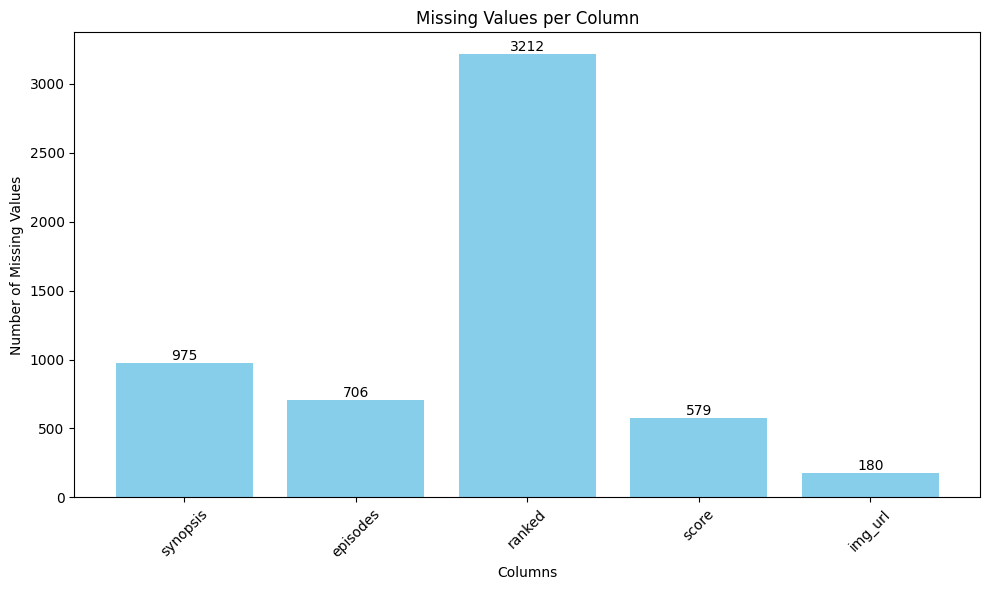

In [4]:
# visualize missing value
import matplotlib.pyplot as plt
missing_counts =Table1_MyAnimeListAnimeRaw.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
# visualize it
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='skyblue')
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)
ax.set_title('Missing Values per Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### duplicates

In [5]:
# find duplicates sum
num_duplicates = Table1_MyAnimeListAnimeRaw.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
duplicates = Table1_MyAnimeListAnimeRaw[Table1_MyAnimeListAnimeRaw.duplicated()]
print("Duplicate rows:")
print(duplicates)

Number of duplicate rows: 2943
Duplicate rows:
         uid                                              title  \
3065   18483  Bishoujo Animerama: Manami no Michi Tono Sou N...   
3071   29111  Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho   
3077   28891                            Haikyuu!! Second Season   
3078   23273                            Shigatsu wa Kimi no Uso   
3079   34599                                      Made in Abyss   
...      ...                                                ...   
19306  32979                                      Flip Flappers   
19307    123                                      Fushigi Yuugi   
19308   1281                                   Gakkou no Kaidan   
19309    450        InuYasha Movie 2: Kagami no Naka no Mugenjo   
19310     87           Mobile Suit Gundam: Char's Counterattack   

                                                synopsis  \
3065                A mix of animation and live-action.    
3071                        

From the EDA, we can see that there are missing values in synopsis, episodes, ranked, score, and img_url, and they are in total 5652. As for the duplicates, we found 2943 duplicates (this does not include the first occurance). 

# Data Cleaning for Table 1

### remove duplicates

In [6]:
# remove duplicates using title
Table1_MyAnimeListAnime = Table1_MyAnimeListAnimeRaw.drop_duplicates(subset="title")

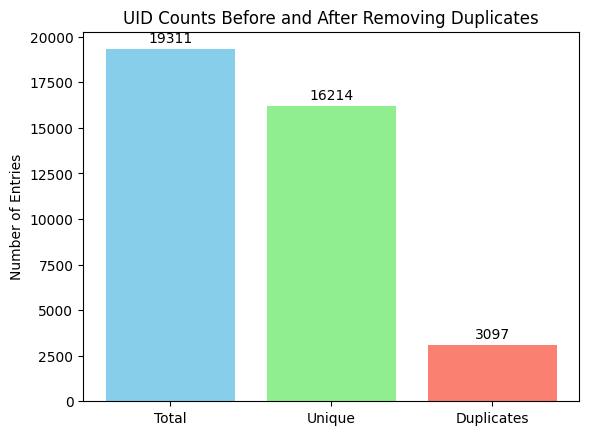

In [7]:
# see the duplicates with plots
total = len(Table1_MyAnimeListAnimeRaw)
unique = len(Table1_MyAnimeListAnime)
duplicate_count = total - unique

labels = ["Total", "Unique", "Duplicates"]
values = [total, unique, duplicate_count]
colors = ["skyblue", "lightgreen", "salmon"]

plt.bar(labels, values, color=colors)
plt.title("UID Counts Before and After Removing Duplicates")
plt.ylabel("Number of Entries")

# label values
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha='center', va='bottom')
plt.show()

### Replace missing values with suitable data

In [8]:
# 'synopsis', 'img_url', 'ranked' are already in NanN format so we stay as it is
missing_specific = Table1_MyAnimeListAnime[Table1_MyAnimeListAnime[['synopsis', 'img_url', 'ranked']].isna().any(axis=1)]
print("'synopsis', 'img_url', or 'ranked' are in NaN format")
print(missing_specific)

'synopsis', 'img_url', or 'ranked' are in NaN format
         uid                                              title synopsis  \
29      9563                     Hidamari Sketch x ☆☆☆ Specials      NaN   
31     33280       Gochuumon wa Usagi Desu ka??: Dear My Sister      NaN   
42     36160                         Yaoguai Mingdan 2nd Season      NaN   
212    36370    Ginga Eiyuu Densetsu: Die Neue These - Seiran 2      NaN   
216    39565   Boku no Hero Academia the Movie 2: Heroes:Rising      NaN   
...      ...                                                ...      ...   
18722  34649     Soukyuu no Fafner: Dead Aggressor - The Beyond      NaN   
18751  39638  Choujigen Game Neptune The Animation: Nep no N...      NaN   
18783   2634                      Doraemon: Doraemon Comes Back      NaN   
18942  38740                                   Bai She: Yuan Qi      NaN   
18954  39912                       Wan Jie Xian Zong 2nd Season      NaN   

                                  

In [9]:
# replace missing values in episodes and score with mean
Table1_MyAnimeListAnime['episodes'] = Table1_MyAnimeListAnime['episodes'].fillna(Table1_MyAnimeListAnime['episodes'].mean())
Table1_MyAnimeListAnime['score'] = Table1_MyAnimeListAnime['score'].fillna(Table1_MyAnimeListAnime['score'].mean())

/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/1489781912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1_MyAnimeListAnime['episodes'] = Table1_MyAnimeListAnime['episodes'].fillna(Table1_MyAnimeListAnime['episodes'].mean())
/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/1489781912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1_MyAnimeListAnime['score'] = Table1_MyAnimeListAnime['score'].fillna(Table1_MyAnimeListAnime['score'].mean())


### Rename the columns

In [10]:
rename_dict = {
    'uid': 'Anime ID',
    'title': 'English Title',
    'aired': 'Broadcast',
    'members': 'Viewers',
    'ranked': 'Rank',
    'img_url': 'Image URL',
    'genre': 'Genre',
    'synopsis': 'Synopsis',
    'episodes': 'Episodes',
    'popularity': 'Popularity',
    'score': 'Score',
    'link': 'Link',
}
    
Table1_MyAnimeListAnime.rename(columns=rename_dict, inplace=True)
Table1_MyAnimeListAnime

/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/2752133389.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1_MyAnimeListAnime.rename(columns=rename_dict, inplace=True)


,Anime ID,English Title,Synopsis,Genre,Broadcast,Episodes,Viewers,Popularity,Rank,Score,Image URL,Link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


### De-Identification

In [11]:
# hash the link column
import hashlib

def hash_link(link):
    if pd.isna(link):
        return None
    return hashlib.sha256(link.encode('utf-8')).hexdigest()

# replace 'Link' directly with its hashed version
Table1_MyAnimeListAnime['Link'] = Table1_MyAnimeListAnime['Link'].apply(hash_link)
Table1_MyAnimeListAnime

/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/2907482758.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table1_MyAnimeListAnime['Link'] = Table1_MyAnimeListAnime['Link'].apply(hash_link)


,Anime ID,English Title,Synopsis,Genre,Broadcast,Episodes,Viewers,Popularity,Rank,Score,Image URL,Link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,f67f280222c4291a4b0a417fb2801d1e272ea7ba964db7...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,8bd6679dc738a41a000b9e81539a6d7f1949c774b195c6...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,43dfbead753360e39bbccc87fee8ec851857cbd42ce49a...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,07fdde59bce68152b3c4a0c75cc3f9b96f492c338e3262...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,a98d266a97bc9f0df253cb0831163f7a6a7f2dff4a40fb...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,7121fd3957ddd26bae2f734b573d11f3b43755c54166f1...
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,d3e39d297935663328c37b52854c7832a6fc6d07e5d1c9...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,bbacbbd69551db245e8d1e9ded7ecff1efdbfb75680408...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,9855881f73cac9a9f48a6b45507fe3e6eb93f48a13a9f9...


### Drop url column

In [12]:
# check the column name
print(Table1_MyAnimeListAnime.columns)

Index(['Anime ID', 'English Title', 'Synopsis', 'Genre', 'Broadcast',
       'Episodes', 'Viewers', 'Popularity', 'Rank', 'Score', 'Image URL',
       'Link'],
      dtype='object')


In [13]:
# drop the image url column
Table1_MyAnimeListAnime = Table1_MyAnimeListAnime.drop(columns=['Image URL'])
Table1_MyAnimeListAnime

,Anime ID,English Title,Synopsis,Genre,Broadcast,Episodes,Viewers,Popularity,Rank,Score,Link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,f67f280222c4291a4b0a417fb2801d1e272ea7ba964db7...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,8bd6679dc738a41a000b9e81539a6d7f1949c774b195c6...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,43dfbead753360e39bbccc87fee8ec851857cbd42ce49a...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,07fdde59bce68152b3c4a0c75cc3f9b96f492c338e3262...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,a98d266a97bc9f0df253cb0831163f7a6a7f2dff4a40fb...
...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,7121fd3957ddd26bae2f734b573d11f3b43755c54166f1...
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,d3e39d297935663328c37b52854c7832a6fc6d07e5d1c9...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,bbacbbd69551db245e8d1e9ded7ecff1efdbfb75680408...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,9855881f73cac9a9f48a6b45507fe3e6eb93f48a13a9f9...


### check outliers

In [14]:
# outliers in score
Q1 = Table1_MyAnimeListAnime["Score"].quantile(0.25)
Q3 = Table1_MyAnimeListAnime["Score"].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
no_outliers = Table1_MyAnimeListAnime[(Table1_MyAnimeListAnime["Score"] >= lower_bound) & (Table1_MyAnimeListAnime["Score"] <= upper_bound)]

In [15]:
# outliers in popularity
Q1 = Table1_MyAnimeListAnime["Popularity"].quantile(0.25)
Q3 = Table1_MyAnimeListAnime["Popularity"].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
no_outliers = Table1_MyAnimeListAnime[(Table1_MyAnimeListAnime["Popularity"] >= lower_bound) & (Table1_MyAnimeListAnime["Popularity"] <= upper_bound)]

# Cleaned Table 1 Visualization

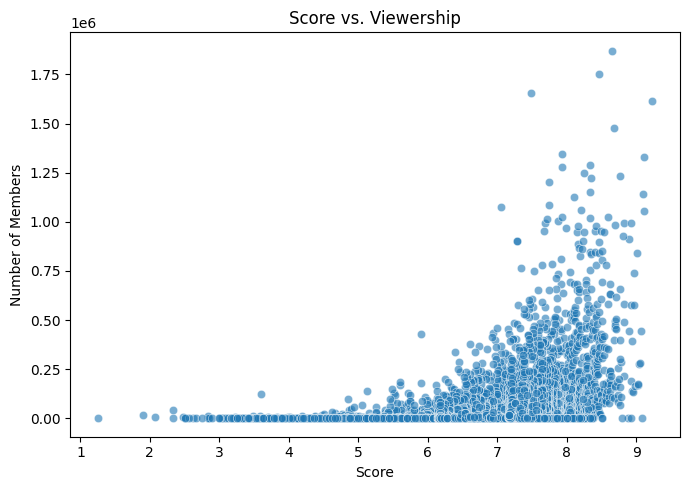

In [16]:
# scores and viewership (maybe related to research question 3)
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.scatterplot(data=no_outliers, x="Score", y="Viewers", alpha=0.6)
plt.title("Score vs. Viewership")
plt.xlabel("Score")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.show()

/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/128621526.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


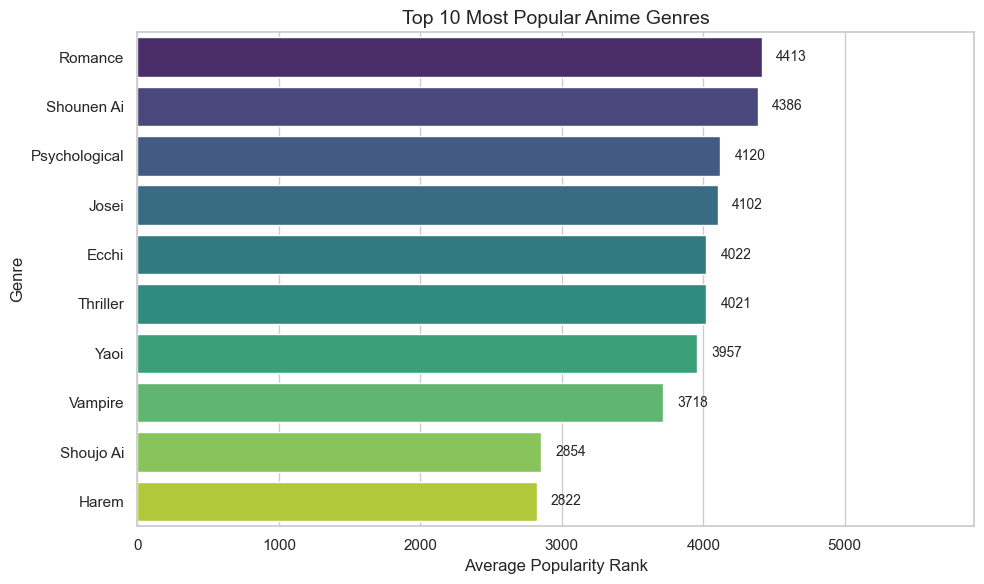

In [17]:
# Copy and clean
df_genre_pop = no_outliers.copy()
df_genre_pop["genre_split"] = df_genre_pop["Genre"].str.replace(r"[\[\]']", "", regex=True).str.split(", ")
genre_exploded = df_genre_pop.explode("genre_split")

# Get top 10 genres with lowest average popularity rank
avg_pop_by_genre = (
    genre_exploded.groupby("genre_split")["Popularity"]
    .mean()
    .sort_values()
    .head(10)
    .sort_values(ascending=False)  # Reverse the order for display
)
# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=avg_pop_by_genre.values,
    y=avg_pop_by_genre.index,
    palette="viridis"
)
# Add value labels
for i, value in enumerate(avg_pop_by_genre.values):
    barplot.text(value + 100, i, f"{value:.0f}", va='center', fontsize=10)
# Format
plt.title("Top 10 Most Popular Anime Genres", fontsize=14)
plt.xlabel("Average Popularity Rank")
plt.ylabel("Genre")
plt.xlim(0, avg_pop_by_genre.values.max() + 1500)
plt.tight_layout()
plt.show()


## EDA for Table 2

In [18]:
Table2_MyAnimeListCharacter = pd.read_csv('Data/characters.csv')
Table2_MyAnimeListCharacter

,mal_id,name,name_kanji,nicknames,favorites,about,main_picture,url
0,417,Lelouch Lamperouge,ルルーシュ・ランペルージ,"['Lelouch vi Britannia', 'Zero', 'Lulu', 'Blac...",156066,"Age: 17 (first season), 18 (second season)\nDa...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/417/Lelouch_...
1,45627,Levi,リヴァイ,[],130849,"Birthday: December 25\nHeight: 160 cm (5'3"")\n...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/45627/Levi
2,71,L Lawliet,エル ローライト,"['Ryuga Hideki', 'Ryuzaki', 'Eraldo Coil', 'De...",119353,"Birthday: October 31, 1979 (1982 in anime)\nZo...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/71/L_Lawliet
3,40,Luffy Monkey D.,モンキー・D・ルフィ,"['Mugiwara', 'Straw Hat', 'Lucy', 'Luffytaro']",118163,"Age: 17; 19\nBirthdate: May 5, Taurus\nHeight:...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/40/Luffy_Mon...
4,62,Zoro Roronoa,ロロノア・ゾロ,"['Pirate Hunter', 'Marimo', 'Zorojuro', 'King ...",94312,"Age: 19; 21\nBirthdate: November 11, Scorpio \...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/62/Zoro_Roronoa
...,...,...,...,...,...,...,...,...
146044,214031,Erika Jiyanome,蛇ノ目 エリカ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214031/Erika...
146045,214032,Hibana Kagari,篝 ヒバナ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214032/Hiban...
146046,214044,Cashel,カシェル,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214044/Cashel
146047,214045,Raj,ラジ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214045/Raj


In [19]:
print(Table2_MyAnimeListCharacter.columns.tolist())

['mal_id', 'name', 'name_kanji', 'nicknames', 'favorites', 'about', 'main_picture', 'url']


In [20]:
# drop duplicates
Table2_MyAnimeListCharacter = Table2_MyAnimeListCharacter.drop_duplicates()
Table2_MyAnimeListCharacter

,mal_id,name,name_kanji,nicknames,favorites,about,main_picture,url
0,417,Lelouch Lamperouge,ルルーシュ・ランペルージ,"['Lelouch vi Britannia', 'Zero', 'Lulu', 'Blac...",156066,"Age: 17 (first season), 18 (second season)\nDa...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/417/Lelouch_...
1,45627,Levi,リヴァイ,[],130849,"Birthday: December 25\nHeight: 160 cm (5'3"")\n...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/45627/Levi
2,71,L Lawliet,エル ローライト,"['Ryuga Hideki', 'Ryuzaki', 'Eraldo Coil', 'De...",119353,"Birthday: October 31, 1979 (1982 in anime)\nZo...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/71/L_Lawliet
3,40,Luffy Monkey D.,モンキー・D・ルフィ,"['Mugiwara', 'Straw Hat', 'Lucy', 'Luffytaro']",118163,"Age: 17; 19\nBirthdate: May 5, Taurus\nHeight:...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/40/Luffy_Mon...
4,62,Zoro Roronoa,ロロノア・ゾロ,"['Pirate Hunter', 'Marimo', 'Zorojuro', 'King ...",94312,"Age: 19; 21\nBirthdate: November 11, Scorpio \...",https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/62/Zoro_Roronoa
...,...,...,...,...,...,...,...,...
146044,214031,Erika Jiyanome,蛇ノ目 エリカ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214031/Erika...
146045,214032,Hibana Kagari,篝 ヒバナ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214032/Hiban...
146046,214044,Cashel,カシェル,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214044/Cashel
146047,214045,Raj,ラジ,[],0,NaN,https://cdn.myanimelist.net/images/characters/...,https://myanimelist.net/character/214045/Raj


In [21]:
# drop image column
Table2_MyAnimeListCharacter.drop(columns=['main_picture'], inplace=True)
Table2_MyAnimeListCharacter

,mal_id,name,name_kanji,nicknames,favorites,about,url
0,417,Lelouch Lamperouge,ルルーシュ・ランペルージ,"['Lelouch vi Britannia', 'Zero', 'Lulu', 'Blac...",156066,"Age: 17 (first season), 18 (second season)\nDa...",https://myanimelist.net/character/417/Lelouch_...
1,45627,Levi,リヴァイ,[],130849,"Birthday: December 25\nHeight: 160 cm (5'3"")\n...",https://myanimelist.net/character/45627/Levi
2,71,L Lawliet,エル ローライト,"['Ryuga Hideki', 'Ryuzaki', 'Eraldo Coil', 'De...",119353,"Birthday: October 31, 1979 (1982 in anime)\nZo...",https://myanimelist.net/character/71/L_Lawliet
3,40,Luffy Monkey D.,モンキー・D・ルフィ,"['Mugiwara', 'Straw Hat', 'Lucy', 'Luffytaro']",118163,"Age: 17; 19\nBirthdate: May 5, Taurus\nHeight:...",https://myanimelist.net/character/40/Luffy_Mon...
4,62,Zoro Roronoa,ロロノア・ゾロ,"['Pirate Hunter', 'Marimo', 'Zorojuro', 'King ...",94312,"Age: 19; 21\nBirthdate: November 11, Scorpio \...",https://myanimelist.net/character/62/Zoro_Roronoa
...,...,...,...,...,...,...,...
146044,214031,Erika Jiyanome,蛇ノ目 エリカ,[],0,NaN,https://myanimelist.net/character/214031/Erika...
146045,214032,Hibana Kagari,篝 ヒバナ,[],0,NaN,https://myanimelist.net/character/214032/Hiban...
146046,214044,Cashel,カシェル,[],0,NaN,https://myanimelist.net/character/214044/Cashel
146047,214045,Raj,ラジ,[],0,NaN,https://myanimelist.net/character/214045/Raj


### De-Identification

In [22]:
# do de-identification

# define a hash function
def hash_url(url):
    if pd.isna(url):
        return None
    return hashlib.sha256(url.encode('utf-8')).hexdigest()

# apply the hash function and replace the original 'url' column
Table2_MyAnimeListCharacter['url'] = Table2_MyAnimeListCharacter['url'].apply(hash_url)

In [23]:
Table2_MyAnimeListCharacter.isnull().sum()

mal_id            0
name              0
name_kanji    35651
nicknames         0
favorites         0
about         56795
url               0
dtype: int64

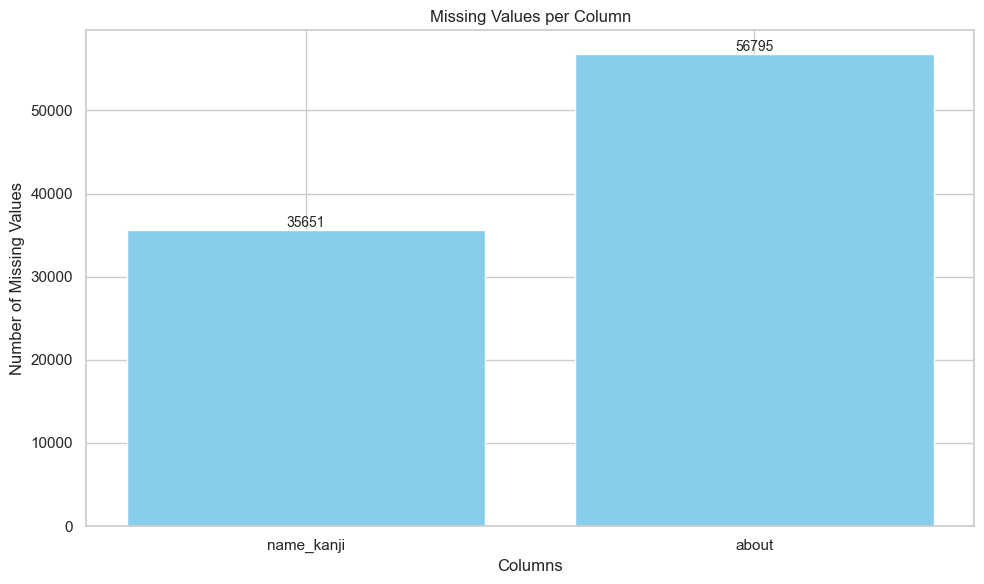

In [24]:
missing_counts =Table2_MyAnimeListCharacter.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
# visualize it
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='skyblue')
# add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)
ax.set_title('Missing Values per Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

### Replace missing values with suitable data

In [25]:
# 'name_kanji', 'about', 'main picture' are already in NanN format so we stay as it is
missing_specific = Table2_MyAnimeListCharacter[Table2_MyAnimeListCharacter[['name_kanji', 'about']].isna().any(axis=1)]
print("'name_kanji', 'about', 'main_picture'are in NaN format")
print(missing_specific)

'name_kanji', 'about', 'main_picture'are in NaN format
        mal_id                  name name_kanji  \
487       2079  Alex Louis Armstrong        NaN   
722      24509                  T.K.        NaN   
808     160388        Rikka Takarada      宝多 六花   
1107      6866                  Kiki        NaN   
1129    185512          Mai Ninomiya      二ノ宮 舞   
...        ...                   ...        ...   
146044  214031        Erika Jiyanome    蛇ノ目 エリカ   
146045  214032         Hibana Kagari      篝 ヒバナ   
146046  214044                Cashel       カシェル   
146047  214045                   Raj         ラジ   
146048  214046                 Gimul        ギムル   

                                nicknames  favorites  \
487     ['Major', 'Strong Arm Alchemist']       3815   
722                                    []       2360   
808                                    []       2034   
1107                                   []       1339   
1129                                   []       1308

### Besides missing values, favorites has many values = 0

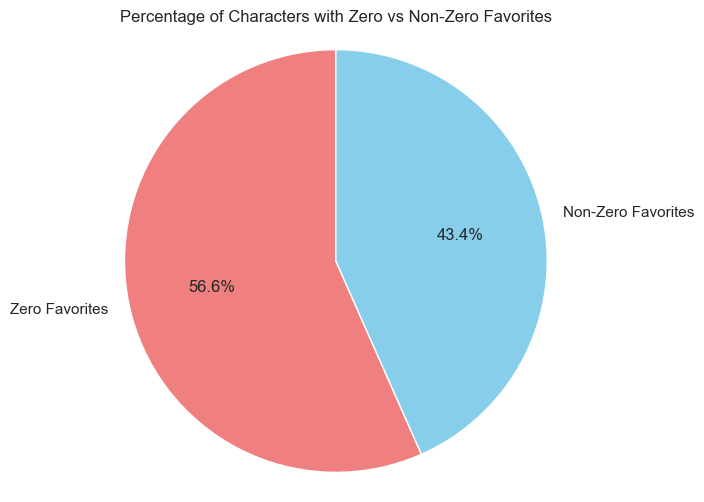

In [26]:
import matplotlib.pyplot as plt

# Count zero and non-zero favorites
len_zero_favorites = len(Table2_MyAnimeListCharacter[Table2_MyAnimeListCharacter["favorites"] == 0])
len_nonzero_favorites = len(Table2_MyAnimeListCharacter[Table2_MyAnimeListCharacter["favorites"] != 0])

# Define labels
labels = ['Zero Favorites', 'Non-Zero Favorites']

# Visualize
plt.figure(figsize=(6, 6))
counts = [len_zero_favorites, len_nonzero_favorites]
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Percentage of Characters with Zero vs Non-Zero Favorites')
plt.axis('equal')
plt.show()

### Rename column names

In [27]:
Table2_MyAnimeListCharacter = Table2_MyAnimeListCharacter.rename(columns={
    'mal_id': 'AnimeID',
    'name': 'CharacterEnglishName',
    'name_kanji': 'CharacterJapaneseName',
    'nicknames': 'CharacterNickName',
    'favorites': 'CharacterFavorites',
    'about': 'InformationAboutCharacter',
    'url': 'HashedURL'
})

## Cleaned Table 2 Visualization

/var/folders/2y/9srxxtvn467cd1mpbn6rq4h80000gn/T/ipykernel_54975/3189661811.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_characters['CharacterEnglishName'], x=top_characters['CharacterFavorites'], palette='magma')


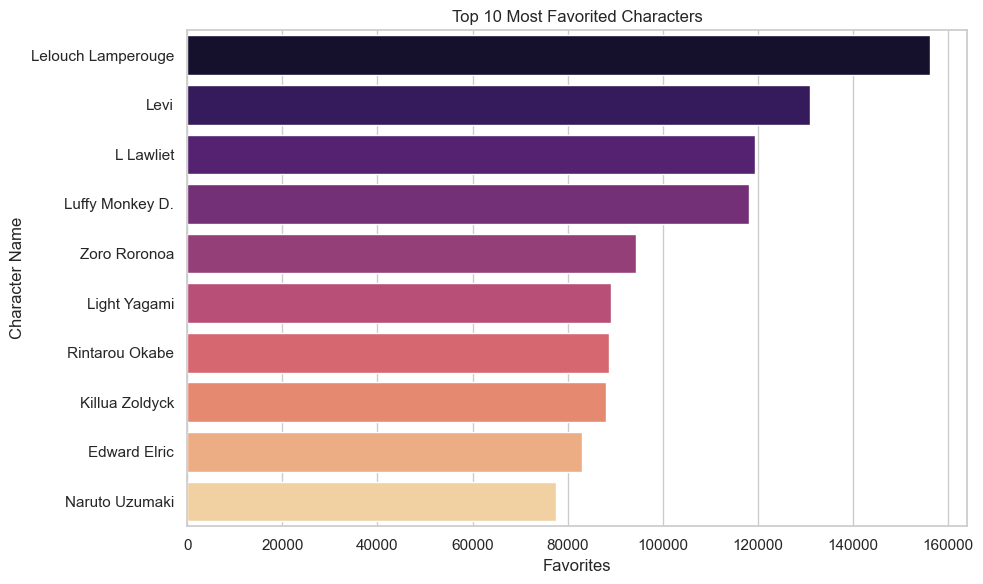

In [28]:
# Sort and get top 10 most favorited characters
top_characters = Table2_MyAnimeListCharacter.sort_values('CharacterFavorites', ascending=False).head(10)
# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_characters['CharacterEnglishName'], x=top_characters['CharacterFavorites'], palette='magma')
plt.title("Top 10 Most Favorited Characters")
plt.xlabel("Favorites")
plt.ylabel("Character Name")
plt.tight_layout()
plt.show()

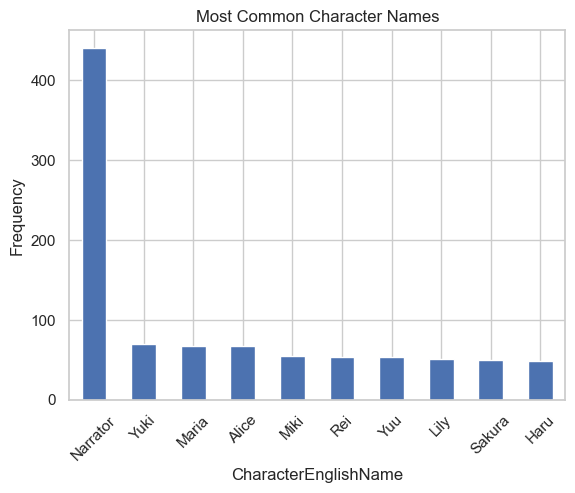

In [29]:
# join issue!! because too many narrators
Table2_MyAnimeListCharacter['CharacterEnglishName'].value_counts().head(10).plot(kind='bar')
plt.title("Most Common Character Names")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## EDA for Table 3

In [30]:
Table3_JikanAPI =  pd.read_csv('Data/myanimelist_data.csv')
Table3_JikanAPI

,mal_id,type,source,airing,rating,members,score_by,favorites,studios
0,1,TV,Original,False,R - 17+ (violence & profanity),1962981,1013487,86174,Sunrise
1,5,Movie,Original,False,R - 17+ (violence & profanity),395962,224301,1692,Bones
2,6,TV,Manga,False,PG-13 - Teens 13 or older,799005,387334,16761,Madhouse
3,7,TV,Original,False,PG-13 - Teens 13 or older,122566,45179,670,Sunrise
4,8,TV,Manga,False,PG - Children,16245,6950,16,Toei Animation
...,...,...,...,...,...,...,...,...,...
1995,2179,OVA,Visual novel,False,PG-13 - Teens 13 or older,3755,1400,2,Pierrot
1996,2180,OVA,Manga,False,PG-13 - Teens 13 or older,3940,1282,2,Pastel
1997,2181,OVA,Original,False,PG-13 - Teens 13 or older,3340,1334,0,DOGA Productions
1998,2182,OVA,Original,False,PG-13 - Teens 13 or older,29139,10301,148,APPP


In [31]:
# check nan value
Table3_JikanAPI.isnull().sum()

mal_id        0
type          0
source        0
airing        0
rating        1
members       0
score_by      0
favorites     0
studios      33
dtype: int64

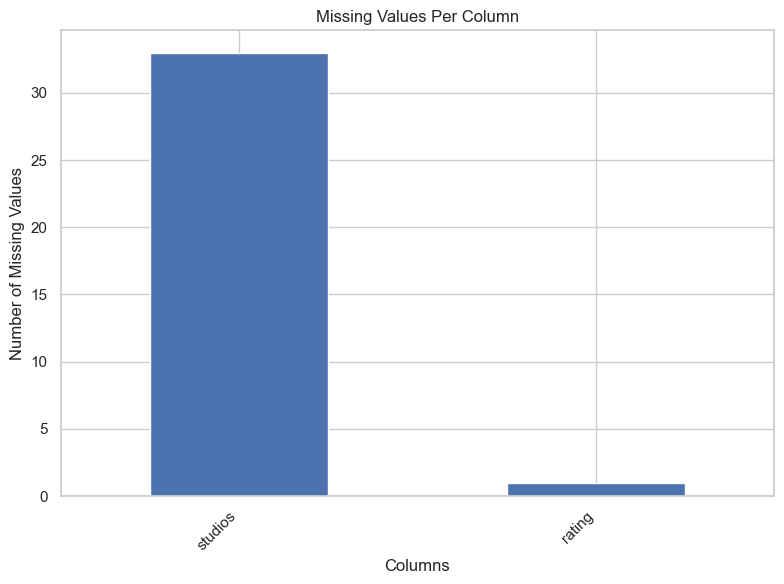

In [32]:
missing_counts = Table3_JikanAPI.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
# visualize missing the value
plt.figure(figsize=(8, 6))
missing_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## EDA for Table 3

In [33]:
Table3_JikanAPI.describe()

,mal_id,members,score_by,favorites
count,2000.00000,2.000000e+03,2.000000e+03,2000.000000
mean,1096.99800,7.846573e+04,4.014820e+04,1408.685000
std,634.25707,2.338387e+05,1.411703e+05,9561.493934
min,1.00000,5.940000e+02,0.000000e+00,0.000000
25%,532.75000,6.812750e+03,2.631000e+03,8.000000
50%,1099.50000,1.641250e+04,6.735000e+03,34.000000
75%,1650.25000,5.316300e+04,2.440925e+04,187.000000
max,2183.00000,4.092268e+06,2.867221e+06,236754.000000


<Axes: >

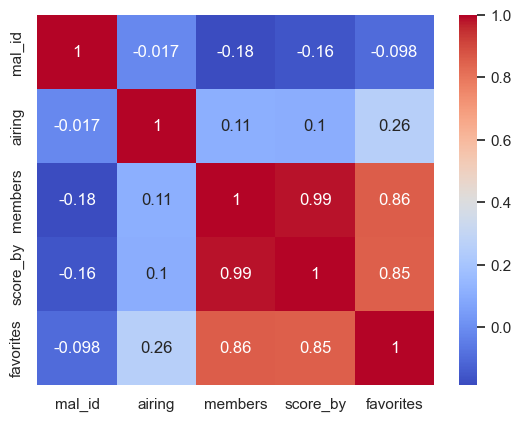

In [34]:
sns.heatmap(Table3_JikanAPI.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [35]:
studio_counts = Table3_JikanAPI['studios'].value_counts().head(10)
studio_counts

studios
Toei Animation       150
Madhouse             138
Sunrise              127
J.C.Staff             90
Pierrot               80
AIC                   75
Studio Deen           74
TMS Entertainment     55
Gonzo                 48
OLM                   44
Name: count, dtype: int64

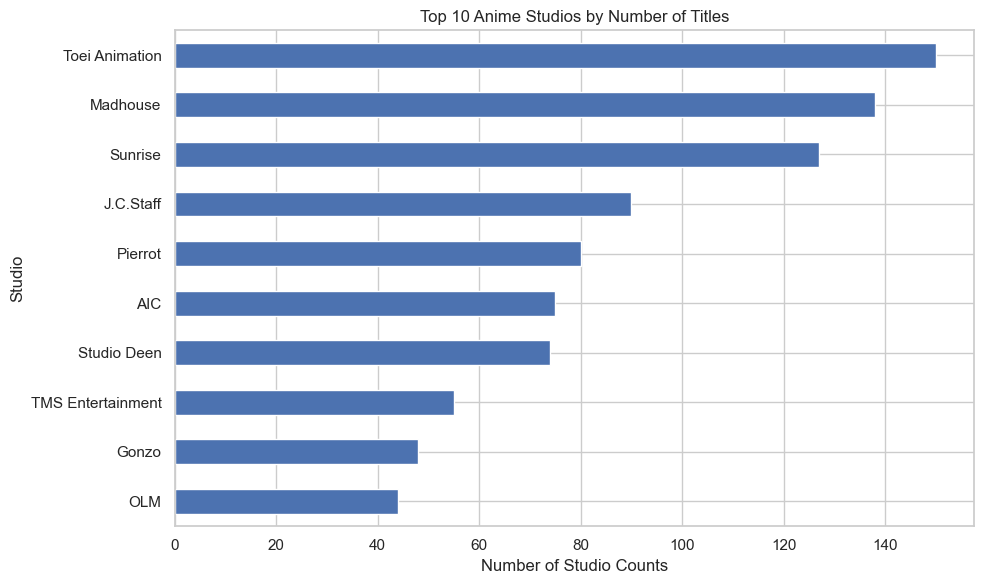

In [36]:
plt.figure(figsize=(10, 6))
studio_counts.plot(kind='barh')
plt.xlabel('Number of Studio Counts')
plt.ylabel('Studio')
plt.title('Top 10 Anime Studios by Number of Titles')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

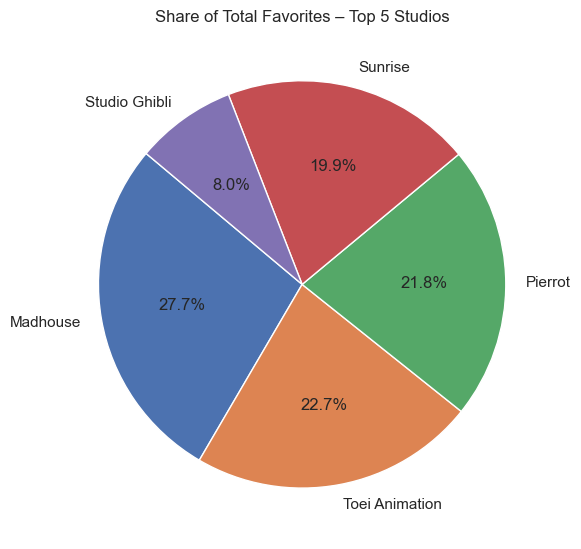

In [37]:
studio_fav_share = Table3_JikanAPI.groupby('studios')['favorites'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6, 6))
studio_fav_share.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Share of Total Favorites – Top 5 Studios')
plt.tight_layout()
plt.show()


### Rename the Columns

In [38]:
# rename the columns
Table3_JikanAPI = Table3_JikanAPI.rename(columns={
    'mal_id': 'AnimeID',
    'type': 'AnimeType',
    'source': 'AnimeSource',
    'airing': 'StillAiring',
    'rating':'AnimeRating',
    'members': 'Members',
    'score_by':'Score Amount',
    'favorites':'Favorites',
    'studios': 'AnimeStudio'
})

### Favorite Rate & Score Rate

In [39]:
# favorite rate
# Favorites / Members
Table3_JikanAPI['Favorite Rate (%)'] = (Table3_JikanAPI['Favorites'] / Table3_JikanAPI['Members']) * 100
Table3_JikanAPI['Favorite Rate (%)'] = Table3_JikanAPI['Favorite Rate (%)'].round(2)
# score rate
# Score Amount / Members
Table3_JikanAPI['Score Rate (%)'] = (Table3_JikanAPI['Score Amount'] / Table3_JikanAPI['Members']) * 100
Table3_JikanAPI['Score Rate (%)'] = Table3_JikanAPI['Score Rate (%)'].round(2)
Table3_JikanAPI

,AnimeID,AnimeType,AnimeSource,StillAiring,AnimeRating,Members,Score Amount,Favorites,AnimeStudio,Favorite Rate (%),Score Rate (%)
0,1,TV,Original,False,R - 17+ (violence & profanity),1962981,1013487,86174,Sunrise,4.39,51.63
1,5,Movie,Original,False,R - 17+ (violence & profanity),395962,224301,1692,Bones,0.43,56.65
2,6,TV,Manga,False,PG-13 - Teens 13 or older,799005,387334,16761,Madhouse,2.10,48.48
3,7,TV,Original,False,PG-13 - Teens 13 or older,122566,45179,670,Sunrise,0.55,36.86
4,8,TV,Manga,False,PG - Children,16245,6950,16,Toei Animation,0.10,42.78
...,...,...,...,...,...,...,...,...,...,...,...
1995,2179,OVA,Visual novel,False,PG-13 - Teens 13 or older,3755,1400,2,Pierrot,0.05,37.28
1996,2180,OVA,Manga,False,PG-13 - Teens 13 or older,3940,1282,2,Pastel,0.05,32.54
1997,2181,OVA,Original,False,PG-13 - Teens 13 or older,3340,1334,0,DOGA Productions,0.00,39.94
1998,2182,OVA,Original,False,PG-13 - Teens 13 or older,29139,10301,148,APPP,0.51,35.35


In [40]:
Table1 = pd.read_csv('Data/animes_clean.csv')
Table1

,Anime Id,English Title,Synopsis,Genre,Broadcast,Episodes,Viewers,Popularity,Rank,Score,Anime Link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,f67f280222c4291a4b0a417fb2801d1e272ea7ba964db7...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,8bd6679dc738a41a000b9e81539a6d7f1949c774b195c6...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,43dfbead753360e39bbccc87fee8ec851857cbd42ce49a...
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,07fdde59bce68152b3c4a0c75cc3f9b96f492c338e3262...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,a98d266a97bc9f0df253cb0831163f7a6a7f2dff4a40fb...
...,...,...,...,...,...,...,...,...,...,...,...
16209,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,7121fd3957ddd26bae2f734b573d11f3b43755c54166f1...
16210,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,d3e39d297935663328c37b52854c7832a6fc6d07e5d1c9...
16211,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,bbacbbd69551db245e8d1e9ded7ecff1efdbfb75680408...
16212,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,9855881f73cac9a9f48a6b45507fe3e6eb93f48a13a9f9...


In [41]:
Table2 = pd.read_csv('Data/characters_clean.csv')
Table2

,Anime Id,Character English Name,Character Japanese Name,Character Nickname,Character Favorites,Information About Character,Url
0,417,Lelouch Lamperouge,ルルーシュ・ランペルージ,"['Lelouch vi Britannia', 'Zero', 'Lulu', 'Blac...",156066,"Age: 17 (first season), 18 (second season)\nDa...",de0ee53ea783660ac26c698f20e53beef2d68aaebd7070...
1,45627,Levi,リヴァイ,[],130849,"Birthday: December 25\nHeight: 160 cm (5'3"")\n...",4904f266e93ad3a88654d2b51f2c5091f55239afee3f81...
2,71,L Lawliet,エル ローライト,"['Ryuga Hideki', 'Ryuzaki', 'Eraldo Coil', 'De...",119353,"Birthday: October 31, 1979 (1982 in anime)\nZo...",5b38f8c0d7c923f63ef60a838fc1491d57b0cf24466e73...
3,40,Luffy Monkey D.,モンキー・D・ルフィ,"['Mugiwara', 'Straw Hat', 'Lucy', 'Luffytaro']",118163,"Age: 17; 19\nBirthdate: May 5, Taurus\nHeight:...",baec519444d221e20941a4d7a4b4c1d14fee6207795059...
4,62,Zoro Roronoa,ロロノア・ゾロ,"['Pirate Hunter', 'Marimo', 'Zorojuro', 'King ...",94312,"Age: 19; 21\nBirthdate: November 11, Scorpio \...",8df29333dfcfbea894be309a6104ee8ea561bfd079965c...
...,...,...,...,...,...,...,...
146044,214031,Erika Jiyanome,蛇ノ目 エリカ,[],0,NaN,8034cfeab5c83e6c83437e7919fbc0fb969cee3a3003f0...
146045,214032,Hibana Kagari,篝 ヒバナ,[],0,NaN,224ad838c2b7a572d01887d9308c4e673c49d59dbf6b56...
146046,214044,Cashel,カシェル,[],0,NaN,67f83914765e7c2b318748b61d2f986603b63979c7db19...
146047,214045,Raj,ラジ,[],0,NaN,f24905635bba292d7aa9dbf483d7c43b4425b25dd2305a...


In [42]:
Table3 = pd.read_csv('Data/myanimelist_data_clean.csv')
Table3

,Anime Id,Anime Type,Anime Source,Airing Status,Anime Mppa Rating,Viewers,Viewers Who Scored,Favorites,Anime Studio,Favorite Rate (%),Score Rate (%)
0,1,TV,Original,False,R - 17+ (violence & profanity),1962981,1013487,86174,Sunrise,4.39,51.63
1,5,Movie,Original,False,R - 17+ (violence & profanity),395962,224301,1692,Bones,0.43,56.65
2,6,TV,Manga,False,PG-13 - Teens 13 or older,799005,387334,16761,Madhouse,2.10,48.48
3,7,TV,Original,False,PG-13 - Teens 13 or older,122566,45179,670,Sunrise,0.55,36.86
4,8,TV,Manga,False,PG - Children,16245,6950,16,Toei Animation,0.10,42.78
...,...,...,...,...,...,...,...,...,...,...,...
1995,2179,OVA,Visual novel,False,PG-13 - Teens 13 or older,3755,1400,2,Pierrot,0.05,37.28
1996,2180,OVA,Manga,False,PG-13 - Teens 13 or older,3940,1282,2,Pastel,0.05,32.54
1997,2181,OVA,Original,False,PG-13 - Teens 13 or older,3340,1334,0,DOGA Productions,0.00,39.94
1998,2182,OVA,Original,False,PG-13 - Teens 13 or older,29139,10301,148,APPP,0.51,35.35


In [43]:
IntegratedTable = pd.read_csv('Data/integrated_anime_data.csv')
IntegratedTable

,Anime Id,Anime Type,Anime Source,Airing Status,Anime Mppa Rating,Viewers,Viewers Who Scored,Favorites,Anime Studio,Favorite Rate (%),...,Popularity,Rank,Score,Anime Link,Character English Name,Character Japanese Name,Character Nickname,Character Favorites,Information About Character,Url
0,1,TV,Original,False,R - 17+ (violence & profanity),1962981,1013487,86174,Sunrise,4.39,...,39.0,26.0,8.81,441c4395eacba6ec90048621f04ab4165bfa1cf0bfc488...,Spike Spiegel,スパイク・スピーゲル,[],42904.0,"Birthdate: June 26, 2044\nHeight: 185 cm (6' 1...",16de2152cee829d201030dd3fc0f9a9ba34f9b59118f5f...
1,5,Movie,Original,False,R - 17+ (violence & profanity),395962,224301,1692,Bones,0.43,...,475.0,149.0,8.40,7cbad3ef22e6d60319d5e680b4a1c9d53982790e5c9ebc...,Ichigo Kurosaki,黒崎 一護,"['Ichi-nii', 'Shinigami Daiko (Substitute Soul...",27723.0,"Race: Human, Shinigami, \nBirthday: July 15 (C...",5b3e63ba896de1a1346fe78fc666427a5f09b2682a9b4b...
2,6,TV,Manga,False,PG-13 - Teens 13 or older,799005,387334,16761,Madhouse,2.10,...,158.0,256.0,8.28,5253e49a7fbcf96f4f195c33b55f920a6b069577519ddc...,Rukia Kuchiki,朽木 ルキア,[],7275.0,Occupation: Shinigami in the 13th Division \nB...,e5e0e7c12d87beb1d73a8b0daf98bac2a737eedb94afe7...
3,7,TV,Original,False,PG-13 - Teens 13 or older,122566,45179,670,Sunrise,0.55,...,1278.0,2487.0,7.32,7cd481629625ae07634da338b2ef0864b287ff175612f0...,Orihime Inoue,井上 織姫,['Hime'],2460.0,"Blood type: B\nHeight: 5'2"" [157 cm]\nWeight: ...",feaf6d21e8f47e94eee0f321d7b9ae8a22f98a8e0dcbf1...
4,8,TV,Manga,False,PG - Children,16245,6950,16,Toei Animation,0.10,...,3968.0,3704.0,7.02,cf12bca97b0edf188e717d122492d8ba622d5944db0565...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2179,OVA,Visual novel,False,PG-13 - Teens 13 or older,3755,1400,2,Pierrot,0.05,...,7721.0,7686.0,6.17,c0b0c2162d9f0be45e1f8618ef3c422a4d2d0a24782777...,Quillsh Wammy,キルシュ ワイミー,"['Watari', 'W']",48.0,"Watari is L's assistant, providing logistics t...",15edd0f464718da45bb9429d1fad20ee359a87fed7c549...
1996,2180,OVA,Manga,False,PG-13 - Teens 13 or older,3940,1282,2,Pastel,0.05,...,7819.0,5458.0,6.63,a4537a2e7f1e325434f89a17b03b006734d2a6c50e8eba...,Mimiru,ミミル,[],73.0,"Mimiru is a Heavy Blade, described on Helba Ga...",ba03bdf9b35f1765e9259bf3c7107ddf3f68e3254b1328...
1997,2181,OVA,Original,False,PG-13 - Teens 13 or older,3340,1334,0,DOGA Productions,0.00,...,7929.0,10861.0,5.02,d657dd2f5ec8c7289fc61605e8d4b1c2ab82c921c1dcc8...,Bear,ベア,['Ryo Sakuma'],51.0,Bear is an older player of the game and plays ...,c61a336af2d23601c6a0cf4151e54170af832ff419d9d3...
1998,2182,OVA,Original,False,PG-13 - Teens 13 or older,29139,10301,148,APPP,0.51,...,3827.0,2380.0,7.34,b19fc7411339a9f01b0880363029f61496c04d94a09ea9...,BT,NaN,['Machiko'],13.0,"BT is a Wavemaster, considered by Helba Gate a...",628f9b0e5729b6cc197184336d9b5b9427b47612df80a9...
